### **Problem Statement : Analyze salary trends across agencies, job titles, and locations using feature extraction and visualizations to optimize payroll and inform workforce planning strategies.**

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import zscore

In [409]:
df = pd.read_csv("PDS2.csv")

In [410]:
# Display basic information about the dataset

print(df.head())  # View the first few rows
print(df.info())  # Get data types and non-null counts
print(df.describe()) # Statistical summary of numerical columns

   Fiscal Year  Payroll Number                Agency Name  Last Name  \
0         2021            67.0  ADMIN FOR CHILDREN'S SVCS      OKORO   
1         2021            67.0  ADMIN FOR CHILDREN'S SVCS  HERNANDEZ   
2         2021            67.0  ADMIN FOR CHILDREN'S SVCS      DAVIS   
3         2021            67.0  ADMIN FOR CHILDREN'S SVCS   SHPONTAK   
4         2021            67.0  ADMIN FOR CHILDREN'S SVCS     PIERRE   

  First Name Mid Init Agency Start Date Work Location Borough  \
0     EDWARD      NaN        06/23/1996             MANHATTAN   
1     NELSON        O          11/07/16             MANHATTAN   
2    MICHAEL        L          02/02/97             MANHATTAN   
3     SERHIY      NaN        03/18/2019             MANHATTAN   
4      KATIA      NaN          07/06/99             MANHATTAN   

                            Title Description Leave Status as of June 30  \
0                 CHILD PROTECTIVE SPECIALIST        ON SEPARATION LEAVE   
1          ADMIN CONSTRU

In [411]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Fiscal Year                       0
Payroll Number                   35
Agency Name                     288
Last Name                      1622
First Name                     1625
Mid Init                      37099
Agency Start Date                 0
Work Location Borough           422
Title Description                 2
Leave Status as of June 30      140
Base Salary                       0
Pay Basis                         0
Regular Hours                     0
Regular Gross Paid                0
OT Hours                          0
Total OT Paid                     0
Total Other Pay                   0
dtype: int64


In [412]:
# Assign unique values to 'Payroll Number'
unique_payroll_numbers = range(1, len(df) + 1)  # Generate a sequence of unique numbers
df['Payroll Number'] = pd.Series(unique_payroll_numbers)  # Assign the unique numbers to the column

print("\nDataFrame with Unique Payroll Numbers:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))


DataFrame with Unique Payroll Numbers:
| Fiscal Year   | Payroll Number   | Agency Name               | Last Name   | First Name   | Mid Init   | Agency Start Date   | Work Location Borough   | Title Description                          | Leave Status as of June 30   | Base Salary   | Pay Basis   | Regular Hours   | Regular Gross Paid   | OT Hours   | Total OT Paid   | Total Other Pay   |
|:--------------|:-----------------|:--------------------------|:------------|:-------------|:-----------|:--------------------|:------------------------|:-------------------------------------------|:-----------------------------|:--------------|:------------|:----------------|:---------------------|:-----------|:----------------|:------------------|
| 2021          | 1                | ADMIN FOR CHILDREN'S SVCS | OKORO       | EDWARD       | nan        | 06/23/1996          | MANHATTAN               | CHILD PROTECTIVE SPECIALIST                | ON SEPARATION LEAVE          | 60351         | per Ann

In [413]:
print("\nMissing Values after handling:\n", df.isnull().sum())


Missing Values after handling:
 Fiscal Year                       0
Payroll Number                    0
Agency Name                     288
Last Name                      1622
First Name                     1625
Mid Init                      37099
Agency Start Date                 0
Work Location Borough           422
Title Description                 2
Leave Status as of June 30      140
Base Salary                       0
Pay Basis                         0
Regular Hours                     0
Regular Gross Paid                0
OT Hours                          0
Total OT Paid                     0
Total Other Pay                   0
dtype: int64


In [414]:
# Create a new column concatenating First Name and Last Name
df['Full Name'] = df['First Name'] + ' ' + df['Last Name']

df.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Full Name
0,2021,1,ADMIN FOR CHILDREN'S SVCS,OKORO,EDWARD,NaN,06/23/1996,MANHATTAN,CHILD PROTECTIVE SPECIALIST,ON SEPARATION LEAVE,60351.00,per Annum,1820.0,332518.52,4.00,661.91,-440.49,EDWARD OKORO
1,2021,2,ADMIN FOR CHILDREN'S SVCS,HERNANDEZ,NELSON,O,11/07/16,MANHATTAN,ADMIN CONSTRUCTION PROJECT MANAGER,ACTIVE,123537.00,per Annum,1820.0,123189.41,678.00,63087.84,3083.22,NELSON HERNANDEZ
2,2021,3,ADMIN FOR CHILDREN'S SVCS,DAVIS,MICHAEL,L,02/02/97,MANHATTAN,CHILD PROTECTIVE SPECIALIST SUPERVISOR,ACTIVE,96579.00,per Annum,1820.0,96307.17,884.00,66729.67,16349.72,MICHAEL DAVIS
3,2021,4,ADMIN FOR CHILDREN'S SVCS,SHPONTAK,SERHIY,NaN,03/18/2019,MANHATTAN,ELECTRICIAN,ACTIVE,427.35,per Day,1820.0,110977.00,648.25,59241.02,2604.64,SERHIY SHPONTAK
4,2021,5,ADMIN FOR CHILDREN'S SVCS,PIERRE,KATIA,NaN,07/06/99,MANHATTAN,ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES,ACTIVE,113000.00,per Annum,1820.0,112682.04,666.50,54745.68,2048.60,KATIA PIERRE


In [415]:
# Drop Mid Init columns
df.drop(columns=['Mid Init'], inplace=True)

df.head()

,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Full Name
0,2021,1,ADMIN FOR CHILDREN'S SVCS,OKORO,EDWARD,06/23/1996,MANHATTAN,CHILD PROTECTIVE SPECIALIST,ON SEPARATION LEAVE,60351.00,per Annum,1820.0,332518.52,4.00,661.91,-440.49,EDWARD OKORO
1,2021,2,ADMIN FOR CHILDREN'S SVCS,HERNANDEZ,NELSON,11/07/16,MANHATTAN,ADMIN CONSTRUCTION PROJECT MANAGER,ACTIVE,123537.00,per Annum,1820.0,123189.41,678.00,63087.84,3083.22,NELSON HERNANDEZ
2,2021,3,ADMIN FOR CHILDREN'S SVCS,DAVIS,MICHAEL,02/02/97,MANHATTAN,CHILD PROTECTIVE SPECIALIST SUPERVISOR,ACTIVE,96579.00,per Annum,1820.0,96307.17,884.00,66729.67,16349.72,MICHAEL DAVIS
3,2021,4,ADMIN FOR CHILDREN'S SVCS,SHPONTAK,SERHIY,03/18/2019,MANHATTAN,ELECTRICIAN,ACTIVE,427.35,per Day,1820.0,110977.00,648.25,59241.02,2604.64,SERHIY SHPONTAK
4,2021,5,ADMIN FOR CHILDREN'S SVCS,PIERRE,KATIA,07/06/99,MANHATTAN,ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES,ACTIVE,113000.00,per Annum,1820.0,112682.04,666.50,54745.68,2048.60,KATIA PIERRE


In [416]:
# Drop First Name and Last Name columns
df.drop(columns=['First Name', 'Last Name'], inplace=True)


In [417]:
# Reorder columns to move 'Full Name' to the fourth position
column_order = list(df.columns)
column_order.insert(3, column_order.pop(column_order.index('Full Name')))
df = df[column_order]

In [418]:
df.head()

,Fiscal Year,Payroll Number,Agency Name,Full Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2021,1,ADMIN FOR CHILDREN'S SVCS,EDWARD OKORO,06/23/1996,MANHATTAN,CHILD PROTECTIVE SPECIALIST,ON SEPARATION LEAVE,60351.00,per Annum,1820.0,332518.52,4.00,661.91,-440.49
1,2021,2,ADMIN FOR CHILDREN'S SVCS,NELSON HERNANDEZ,11/07/16,MANHATTAN,ADMIN CONSTRUCTION PROJECT MANAGER,ACTIVE,123537.00,per Annum,1820.0,123189.41,678.00,63087.84,3083.22
2,2021,3,ADMIN FOR CHILDREN'S SVCS,MICHAEL DAVIS,02/02/97,MANHATTAN,CHILD PROTECTIVE SPECIALIST SUPERVISOR,ACTIVE,96579.00,per Annum,1820.0,96307.17,884.00,66729.67,16349.72
3,2021,4,ADMIN FOR CHILDREN'S SVCS,SERHIY SHPONTAK,03/18/2019,MANHATTAN,ELECTRICIAN,ACTIVE,427.35,per Day,1820.0,110977.00,648.25,59241.02,2604.64
4,2021,5,ADMIN FOR CHILDREN'S SVCS,KATIA PIERRE,07/06/99,MANHATTAN,ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES,ACTIVE,113000.00,per Annum,1820.0,112682.04,666.50,54745.68,2048.60


In [419]:
print("\nMissing Values after handling:\n", df.isnull().sum())


Missing Values after handling:
 Fiscal Year                      0
Payroll Number                   0
Agency Name                    288
Full Name                     1625
Agency Start Date                0
Work Location Borough          422
Title Description                2
Leave Status as of June 30     140
Base Salary                      0
Pay Basis                        0
Regular Hours                    0
Regular Gross Paid               0
OT Hours                         0
Total OT Paid                    0
Total Other Pay                  0
dtype: int64


In [420]:
# Forward and Backward Fill Randomly for 'Agency Name'

import pandas as pd
import numpy as np


# Get the boolean mask for missing 'Agency Name' values
missing_mask = df['Agency Name'].isnull()

# Get the indices of the missing values
missing_indices = df[missing_mask].index

# Create a boolean mask to randomly choose between forward and backward fill
mask = np.random.choice([True, False], size=len(missing_indices))

# Apply forward fill to the selected indices
df.loc[missing_indices[mask], 'Agency Name'] = df['Agency Name'].ffill()[missing_indices[mask]]

# Apply backward fill to the remaining missing indices
df.loc[missing_indices[~mask], 'Agency Name'] = df['Agency Name'].bfill()[missing_indices[~mask]]

print("\nMissing Values after handling:\n", df.isnull().sum())


Missing Values after handling:
 Fiscal Year                      0
Payroll Number                   0
Agency Name                      0
Full Name                     1625
Agency Start Date                0
Work Location Borough          422
Title Description                2
Leave Status as of June 30     140
Base Salary                      0
Pay Basis                        0
Regular Hours                    0
Regular Gross Paid               0
OT Hours                         0
Total OT Paid                    0
Total Other Pay                  0
dtype: int64


In [421]:
# Drop rows with missing values in 'Full Name' (if the column exists)
if 'Full Name' in df.columns:
    df.dropna(subset=['Full Name'], inplace=True)

In [422]:
print("\nMissing Values after handling:\n", df.isnull().sum())


Missing Values after handling:
 Fiscal Year                     0
Payroll Number                  0
Agency Name                     0
Full Name                       0
Agency Start Date               0
Work Location Borough         420
Title Description               2
Leave Status as of June 30    140
Base Salary                     0
Pay Basis                       0
Regular Hours                   0
Regular Gross Paid              0
OT Hours                        0
Total OT Paid                   0
Total Other Pay                 0
dtype: int64


In [423]:
import pandas as pd

# Calculate the overall most common 'Work Location Borough'
most_common_location_overall = df['Work Location Borough'].mode()[0]

# Fill missing 'Work Location Borough' with the overall mode
df['Work Location Borough'].fillna(most_common_location_overall, inplace=True)

print("\nMissing Values after handling:\n", df.isnull().sum())



Missing Values after handling:
 Fiscal Year                     0
Payroll Number                  0
Agency Name                     0
Full Name                       0
Agency Start Date               0
Work Location Borough           0
Title Description               2
Leave Status as of June 30    140
Base Salary                     0
Pay Basis                       0
Regular Hours                   0
Regular Gross Paid              0
OT Hours                        0
Total OT Paid                   0
Total Other Pay                 0
dtype: int64


<ipython-input-423-1c6bd2c85b7b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Work Location Borough'].fillna(most_common_location_overall, inplace=True)


In [424]:
# Handle missing values in 'Leave Status as of June 30'

# Calculate the most frequent value in 'Leave Status as of June 30'
most_frequent_leave_status = df['Leave Status as of June 30'].mode()[0]

# Fill missing values and assign the result back to the column
df['Leave Status as of June 30'] = df['Leave Status as of June 30'].fillna(most_frequent_leave_status)

print("\nMissing Values after handling:\n", df.isnull().sum())


Missing Values after handling:
 Fiscal Year                   0
Payroll Number                0
Agency Name                   0
Full Name                     0
Agency Start Date             0
Work Location Borough         0
Title Description             2
Leave Status as of June 30    0
Base Salary                   0
Pay Basis                     0
Regular Hours                 0
Regular Gross Paid            0
OT Hours                      0
Total OT Paid                 0
Total Other Pay               0
dtype: int64


In [425]:
# Drop rows with missing values in 'Title Description'
df.dropna(subset=['Title Description'], inplace=True)

print("\nMissing Values after handling:\n", df.isnull().sum())


Missing Values after handling:
 Fiscal Year                   0
Payroll Number                0
Agency Name                   0
Full Name                     0
Agency Start Date             0
Work Location Borough         0
Title Description             0
Leave Status as of June 30    0
Base Salary                   0
Pay Basis                     0
Regular Hours                 0
Regular Gross Paid            0
OT Hours                      0
Total OT Paid                 0
Total Other Pay               0
dtype: int64


In [426]:
# Save the updated file to CSV
file_path = '/content/Updated_Citywide_Payroll_Data.csv'
df.to_csv(file_path, index=False)

file_path

'/content/Updated_Citywide_Payroll_Data.csv'

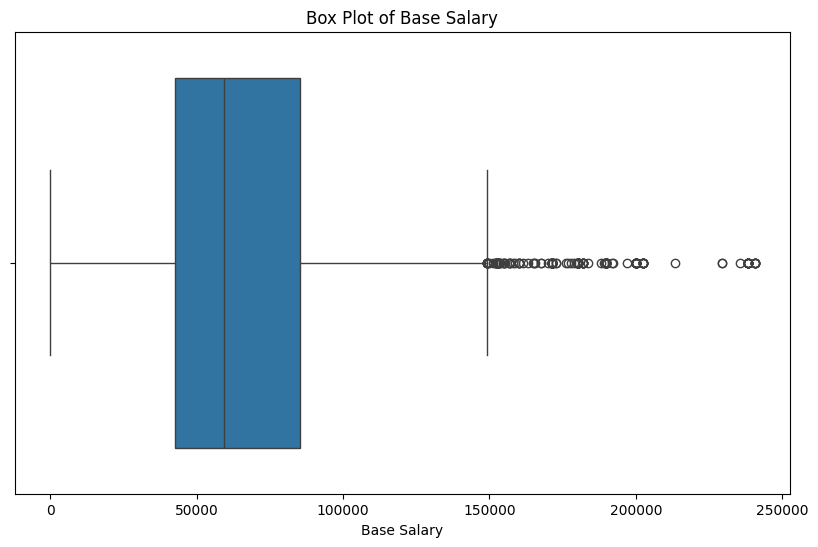

In [427]:
#1. Box Plot for Outlier Detection
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Base Salary
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Base Salary'])
plt.title('Box Plot of Base Salary')
plt.show()

The interquartile range (IQR) analysis reveals that:

The lower bound for outliers is -20,570.5, which is unrealistic for salaries (indicating possible data errors).
The upper bound for outliers is 148,809.5.
There are 449 outliers beyond these thresholds.

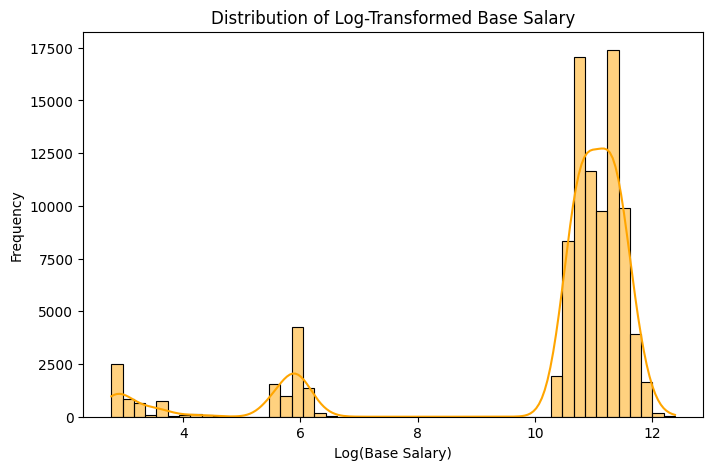

In [428]:
# Handling outliers- Transform data (e.g., log transformation) to reduce the impact of outliers.
#Apply log transformation (adding 1 to avoid log(0) issues)
df["Base Salary (Log)"] = np.log1p(df["Base Salary"])

# Plot the transformed salary distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Base Salary (Log)"], bins=50, kde=True, color="orange")
plt.title("Distribution of Log-Transformed Base Salary")
plt.xlabel("Log(Base Salary)")
plt.ylabel("Frequency")
plt.show()

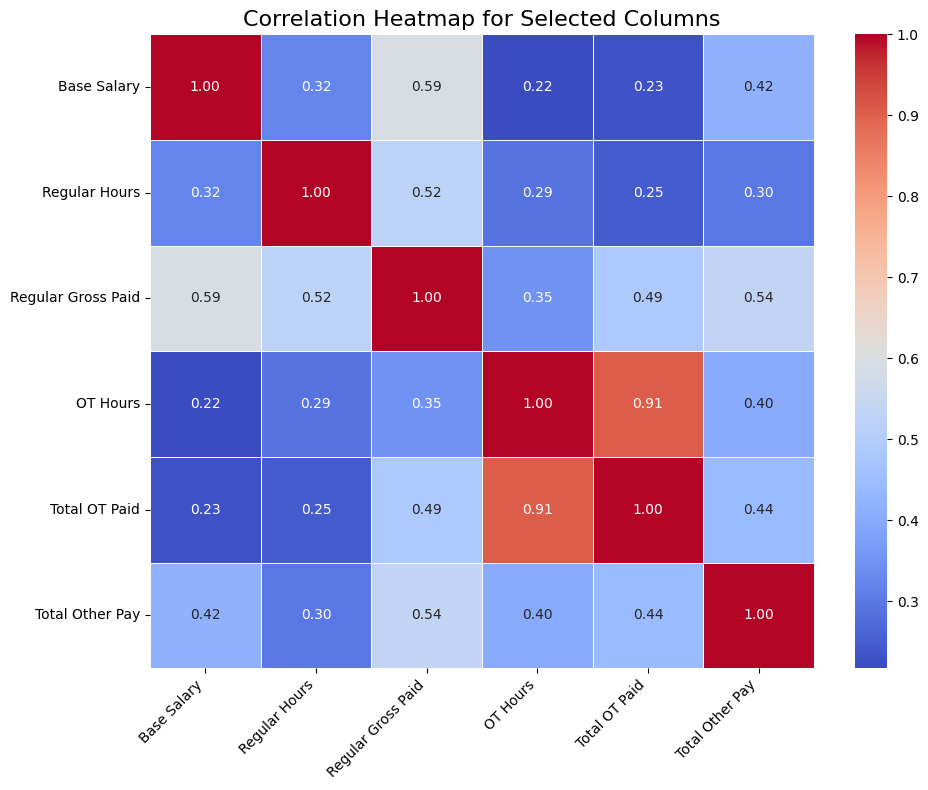

In [429]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the specified columns
selected_columns = ['Base Salary', 'Regular Hours', 'Regular Gross Paid', 'OT Hours', 'Total OT Paid', 'Total Other Pay']
df_selected = df[selected_columns]

# Compute correlation matrix for the selected columns
corr_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Selected Columns', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()

In [430]:
df.columns

Index(['Fiscal Year', 'Payroll Number', 'Agency Name', 'Full Name',
       'Agency Start Date', 'Work Location Borough', 'Title Description',
       'Leave Status as of June 30', 'Base Salary', 'Pay Basis',
       'Regular Hours', 'Regular Gross Paid', 'OT Hours', 'Total OT Paid',
       'Total Other Pay', 'Base Salary (Log)'],
      dtype='object')

### **Problem Statement : Analyze salary trends across agencies, job titles, and locations using feature extraction and visualizations to optimize payroll and inform workforce planning strategies.**

**Display Top 10 Agencies and titles with highest mean salaries**

In [431]:
# Group by Agency Name and calculate salary statistics
agency_salary_trends = df.groupby("Agency Name")["Base Salary"].agg(["mean", "median", "count"]).sort_values(by="mean", ascending=False)

# Group by Job Title
job_title_salary_trends = df.groupby("Title Description")["Base Salary"].agg(["mean", "median", "count"]).sort_values(by="mean", ascending=False)

# Display top 10 agencies with highest mean salaries
print(agency_salary_trends.head(10))

# Display top 10 job titles with highest mean salaries
print(job_title_salary_trends.head(10))

                                         mean    median  count
Agency Name                                                   
BOARD OF CORRECTION             106023.000000  106023.0      1
TAX COMMISSION                  103454.555556  107129.0     18
DEPT. OF DESIGN & CONSTRUCTION   84559.910798   78989.0    213
CAMPAIGN FINANCE BOARD           83274.774384   73890.0     73
FINANCIAL INFO SVCS AGENCY       78643.351852   78654.0     54
DEPARTMENT OF CORRECTION         78160.553391   92073.0   6352
DEPARTMENT FOR THE AGING         78079.571429   77254.0     14
DEPARTMENT OF FINANCE            76161.214932   80638.0    442
OFF OF PAYROLL ADMINISTRATION    75832.160000   72553.0     25
NYC FIRE PENSION FUND            75390.333333   77488.0     15
                                                        mean    median  count
Title Description                                                            
CAPTAIN DETAILED AS ASSISTANT CHIEF INSPECTOR  240511.000000  240511.0      6
CHIEF FIRE

**Avg Salary of Top 10 Agencies**

<ipython-input-432-eb52096f353a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_agencies.index, y=top_agencies["mean"], palette="Blues_r")


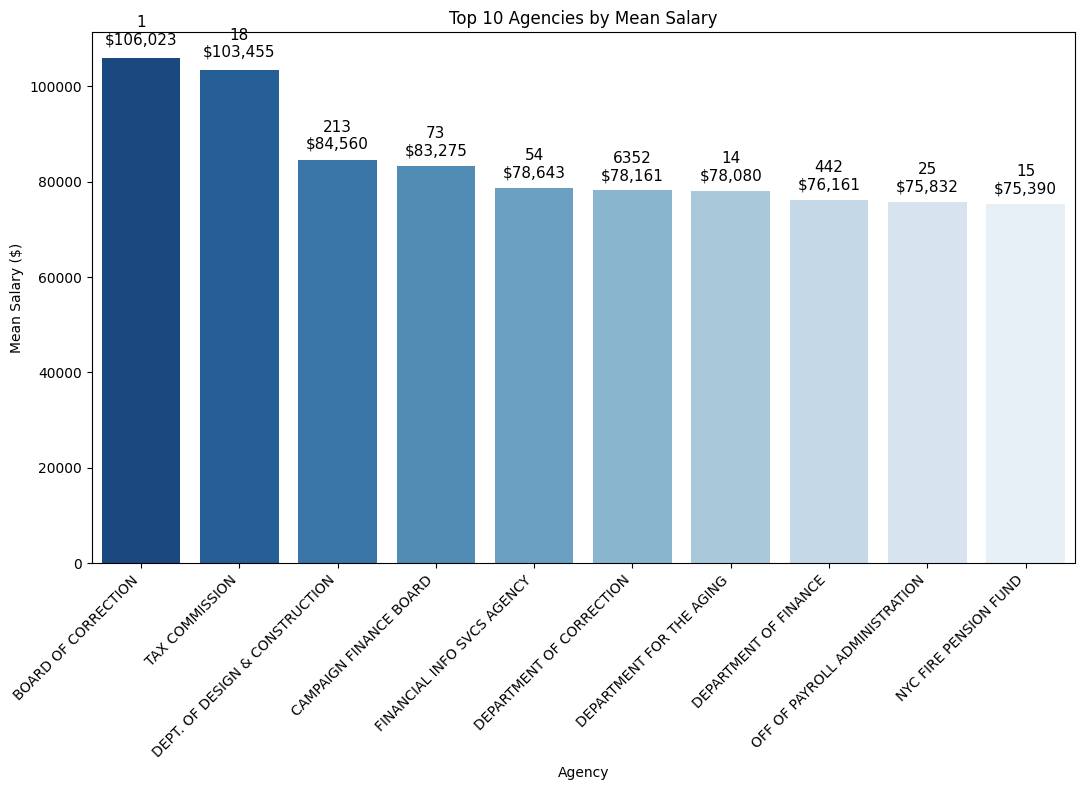

In [432]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 agencies with the highest mean salary
top_agencies = agency_salary_trends.head(10)

plt.figure(figsize=(11, 8))
ax = sns.barplot(x=top_agencies.index, y=top_agencies["mean"], palette="Blues_r")

# Add counts and mean salary on top of each bar
for i, (mean, count) in enumerate(zip(top_agencies["mean"], top_agencies["count"])):
    ax.text(i, mean + 0.02 * mean, f'{((count))}\n${mean:,.0f}', ha='center', va='bottom', fontsize=11)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Agency")
plt.ylabel("Mean Salary ($)")
plt.title("Top 10 Agencies by Mean Salary")
plt.tight_layout()  # Adjust layout to prevent text overlap
plt.show()

**Top 10 Job Titles based on number of employees**

<ipython-input-433-03195123bf40>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=job_title_counts.index, y=job_title_counts.values, palette="viridis")


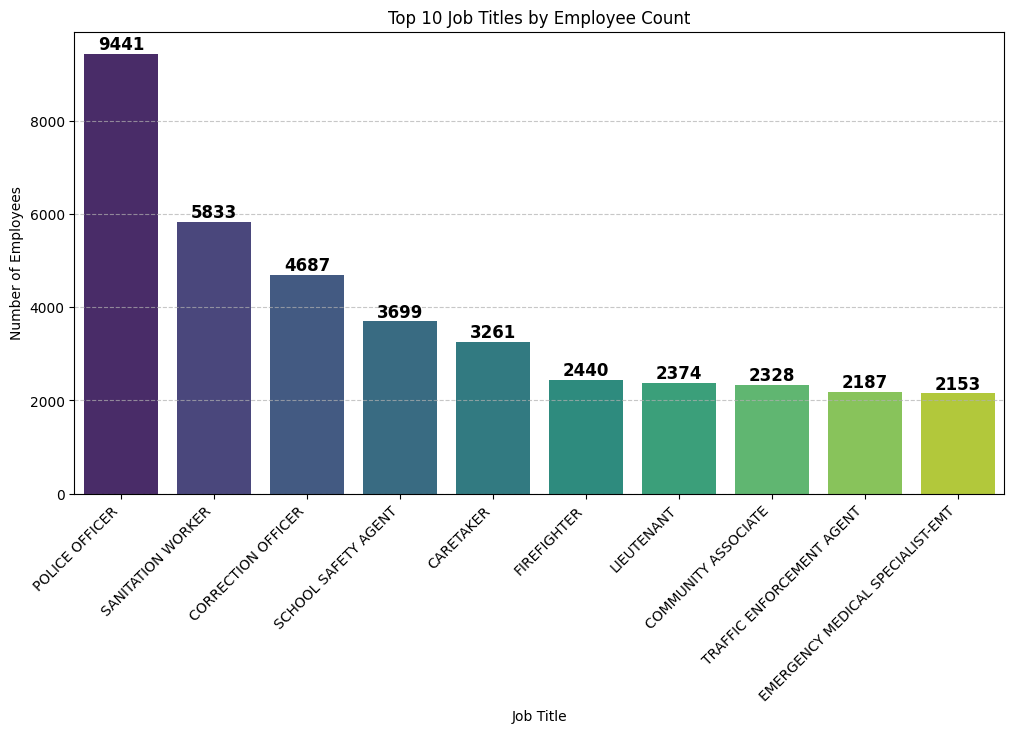

In [433]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of employees per job title
job_title_counts = df["Title Description"].value_counts().head(10)

# Plot Bar Chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=job_title_counts.index, y=job_title_counts.values, palette="viridis")

# Add values on top of bars
gap = 0.01 * max(job_title_counts.values)
for i, v in enumerate(job_title_counts.values):
    ax.text(i, v + gap, str(v), ha='center', fontsize=12, fontweight='bold')

# Formatting
plt.xticks(rotation=45, ha="right")
plt.xlabel("Job Title")
plt.ylabel("Number of Employees")
plt.title("Top 10 Job Titles by Employee Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


**Employee distribution based on Work Location**

<ipython-input-434-b5e9fe4a6f79>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=location_counts["Work Location Borough"], y=location_counts["Number of Employees"], palette="coolwarm")


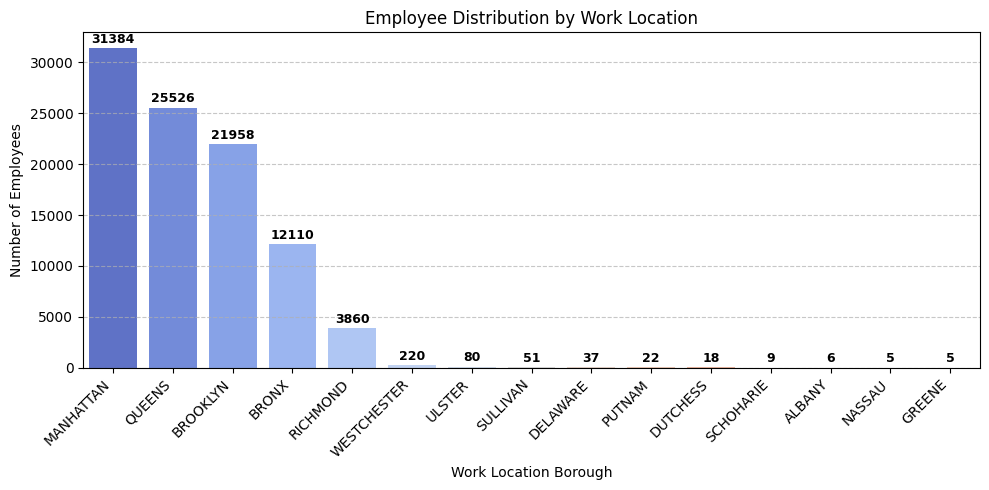

In [434]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of employees per Work Location Borough
location_counts = df['Work Location Borough'].value_counts().reset_index()
location_counts.columns = ['Work Location Borough', 'Number of Employees']

# Plot Bar Chart for Work Location and Number of Employees
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=location_counts["Work Location Borough"], y=location_counts["Number of Employees"], palette="coolwarm")

# Add values on top of bars with a gap
gap = 0.017 * max(location_counts["Number of Employees"])  # Gap is 5% of the max bar height
for i, v in enumerate(location_counts["Number of Employees"]):
    ax.text(i, v + gap, str(v), ha='center', fontsize=9, fontweight='bold')

# Formatting
plt.xticks(rotation=45, ha="right")
plt.xlabel("Work Location Borough")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution by Work Location")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent text overlap
plt.show()

**Employee Distribution based on Job Title and Work Location**

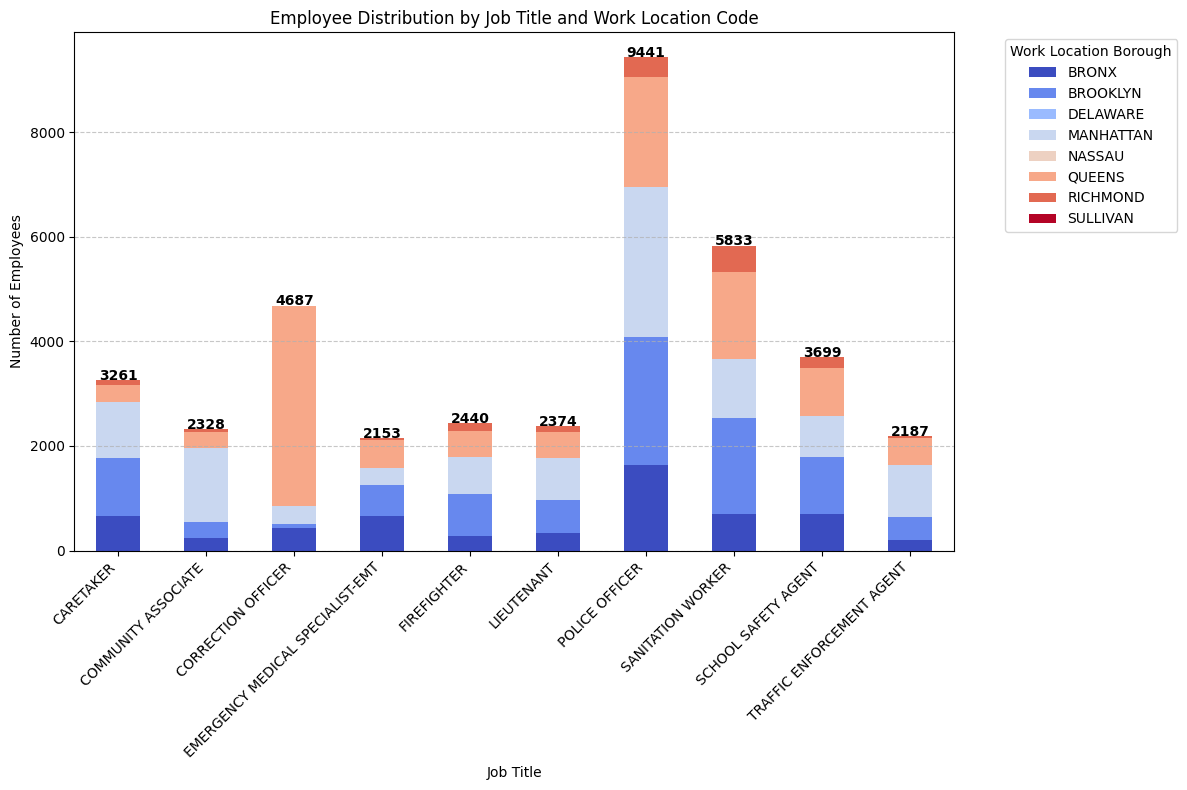

In [435]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 job titles with the most employees
top_job_titles = df["Title Description"].value_counts().head(10).index
filtered_df = df[df["Title Description"].isin(top_job_titles)]

# Count occurrences of Job Title and Work Location Code
job_location_counts = filtered_df.groupby(["Title Description", "Work Location Borough"]).size().unstack()

# Plot stacked bar chart
ax = job_location_counts.plot(kind="bar", stacked=True, figsize=(12, 8), colormap="coolwarm")

# Add total counts on top of each bar
for i, total in enumerate(job_location_counts.sum(axis=1)):
    ax.text(i, total + 5, f'{int(total)}', ha='center', fontsize=10, fontweight='bold')

# Formatting
plt.xlabel("Job Title")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution by Job Title and Work Location Code")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Work Location Borough", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent text overlap
plt.show()

**FEATURE ENGINEERING**

In [436]:
#Handling Categorical Variables

# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Work Location Borough', 'Title Description', 'Leave Status as of June 30'])

df_encoded.head()

,Fiscal Year,Payroll Number,Agency Name,Full Name,Agency Start Date,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,...,Title Description_WIPER,Title Description_WORKER'S COMPENSATION BENEFITS EXAMINER,Title Description_X-RAY TECHNICIAN,Title Description_YOUTH COORDINATOR,Title Description_YOUTH DEVELOPMENT SPECIALIST,Leave Status as of June 30_ACTIVE,Leave Status as of June 30_CEASED,Leave Status as of June 30_ON LEAVE,Leave Status as of June 30_ON SEPARATION LEAVE,Leave Status as of June 30_SEASONAL
0,2021,1,ADMIN FOR CHILDREN'S SVCS,EDWARD OKORO,06/23/1996,60351.00,per Annum,1820.0,332518.52,4.00,...,False,False,False,False,False,False,False,False,True,False
1,2021,2,ADMIN FOR CHILDREN'S SVCS,NELSON HERNANDEZ,11/07/16,123537.00,per Annum,1820.0,123189.41,678.00,...,False,False,False,False,False,True,False,False,False,False
2,2021,3,ADMIN FOR CHILDREN'S SVCS,MICHAEL DAVIS,02/02/97,96579.00,per Annum,1820.0,96307.17,884.00,...,False,False,False,False,False,True,False,False,False,False
3,2021,4,ADMIN FOR CHILDREN'S SVCS,SERHIY SHPONTAK,03/18/2019,427.35,per Day,1820.0,110977.00,648.25,...,False,False,False,False,False,True,False,False,False,False
4,2021,5,ADMIN FOR CHILDREN'S SVCS,KATIA PIERRE,07/06/99,113000.00,per Annum,1820.0,112682.04,666.50,...,False,False,False,False,False,True,False,False,False,False


In [437]:
# Creating a new feature: Total Pay
df['Total Pay'] = df['Regular Gross Paid'] + df['Total OT Paid'] + df['Total Other Pay']

df.head()

,Fiscal Year,Payroll Number,Agency Name,Full Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Base Salary (Log),Total Pay
0,2021,1,ADMIN FOR CHILDREN'S SVCS,EDWARD OKORO,06/23/1996,MANHATTAN,CHILD PROTECTIVE SPECIALIST,ON SEPARATION LEAVE,60351.00,per Annum,1820.0,332518.52,4.00,661.91,-440.49,11.007949,332739.94
1,2021,2,ADMIN FOR CHILDREN'S SVCS,NELSON HERNANDEZ,11/07/16,MANHATTAN,ADMIN CONSTRUCTION PROJECT MANAGER,ACTIVE,123537.00,per Annum,1820.0,123189.41,678.00,63087.84,3083.22,11.724304,189360.47
2,2021,3,ADMIN FOR CHILDREN'S SVCS,MICHAEL DAVIS,02/02/97,MANHATTAN,CHILD PROTECTIVE SPECIALIST SUPERVISOR,ACTIVE,96579.00,per Annum,1820.0,96307.17,884.00,66729.67,16349.72,11.478127,179386.56
3,2021,4,ADMIN FOR CHILDREN'S SVCS,SERHIY SHPONTAK,03/18/2019,MANHATTAN,ELECTRICIAN,ACTIVE,427.35,per Day,1820.0,110977.00,648.25,59241.02,2604.64,6.059941,172822.66
4,2021,5,ADMIN FOR CHILDREN'S SVCS,KATIA PIERRE,07/06/99,MANHATTAN,ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES,ACTIVE,113000.00,per Annum,1820.0,112682.04,666.50,54745.68,2048.60,11.635152,169476.32


In [438]:
# Feature Extraction

#Categorize Employees by Salary Range

bins = [0, 50000, 100000, 150000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
df['Salary Range'] = pd.cut(df['Base Salary'], bins=bins, labels=labels)

df.head()

,Fiscal Year,Payroll Number,Agency Name,Full Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay,Base Salary (Log),Total Pay,Salary Range
0,2021,1,ADMIN FOR CHILDREN'S SVCS,EDWARD OKORO,06/23/1996,MANHATTAN,CHILD PROTECTIVE SPECIALIST,ON SEPARATION LEAVE,60351.00,per Annum,1820.0,332518.52,4.00,661.91,-440.49,11.007949,332739.94,Medium
1,2021,2,ADMIN FOR CHILDREN'S SVCS,NELSON HERNANDEZ,11/07/16,MANHATTAN,ADMIN CONSTRUCTION PROJECT MANAGER,ACTIVE,123537.00,per Annum,1820.0,123189.41,678.00,63087.84,3083.22,11.724304,189360.47,High
2,2021,3,ADMIN FOR CHILDREN'S SVCS,MICHAEL DAVIS,02/02/97,MANHATTAN,CHILD PROTECTIVE SPECIALIST SUPERVISOR,ACTIVE,96579.00,per Annum,1820.0,96307.17,884.00,66729.67,16349.72,11.478127,179386.56,Medium
3,2021,4,ADMIN FOR CHILDREN'S SVCS,SERHIY SHPONTAK,03/18/2019,MANHATTAN,ELECTRICIAN,ACTIVE,427.35,per Day,1820.0,110977.00,648.25,59241.02,2604.64,6.059941,172822.66,Low
4,2021,5,ADMIN FOR CHILDREN'S SVCS,KATIA PIERRE,07/06/99,MANHATTAN,ADMINISTRATIVE DIRECTOR OF SOCIAL SERVICES,ACTIVE,113000.00,per Annum,1820.0,112682.04,666.50,54745.68,2048.60,11.635152,169476.32,High


In [439]:
df=pd.read_csv("Updated_Citywide_Payroll_Data.csv")

**Top 5 Agencies with Highest OT Expense**

Total Overtime Expenses: $1,262,020,407.58

Top 5 Agencies with Highest Overtime Expenses:
Agency Name
DEPARTMENT OF SANITATION    2.744141e+08
POLICE DEPARTMENT           2.608799e+08
FIRE DEPARTMENT             1.894766e+08
NYC HOUSING AUTHORITY       1.237119e+08
DEPARTMENT OF CORRECTION    1.022271e+08
Name: Total OT Paid, dtype: float64


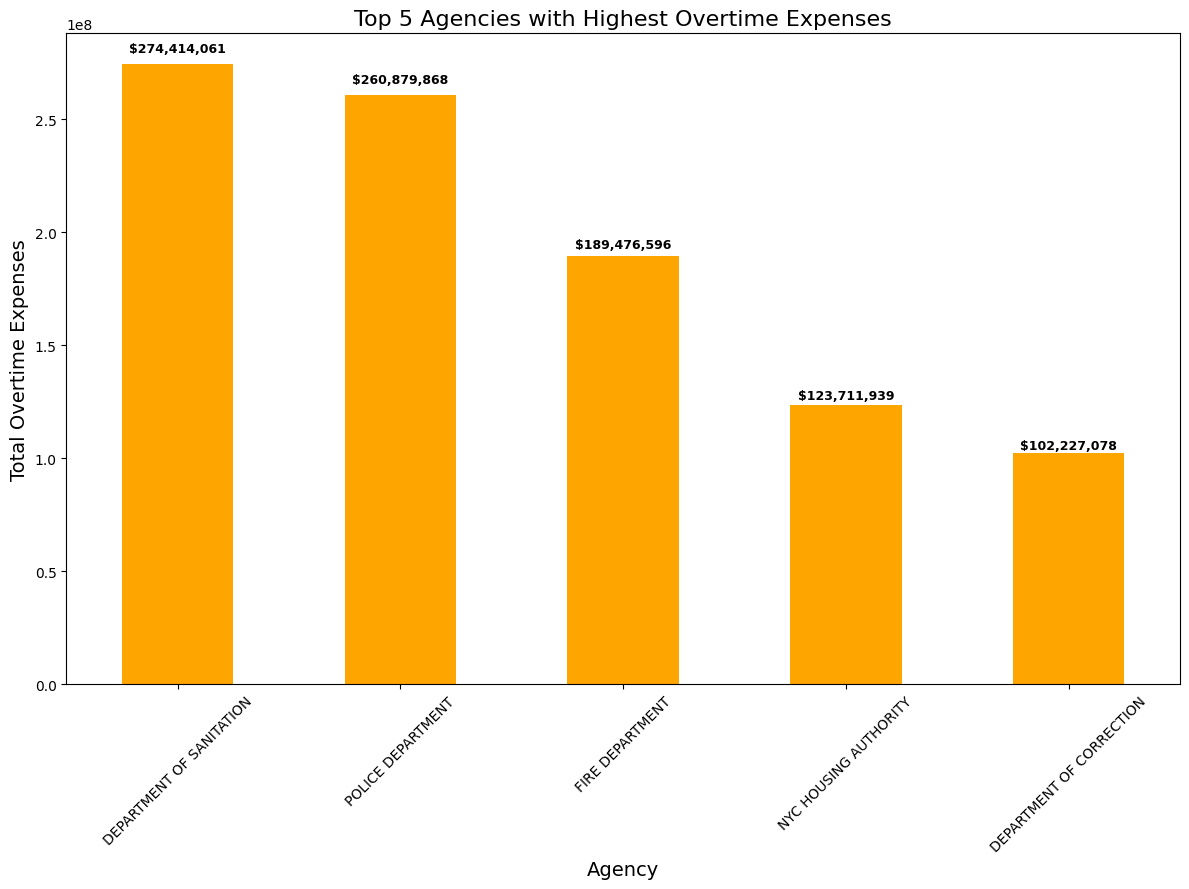

In [440]:
# Calculate total payroll expenses for each employee
df['Total Payroll'] = df['Regular Gross Paid'] + df['Total OT Paid'] + df['Total Other Pay']

# 1. Payroll Optimization Insights
# Analyze overtime expenses
overtime_expenses = df['Total OT Paid'].sum()
print(f"Total Overtime Expenses: ${overtime_expenses:,.2f}")

# Identify top agencies with high overtime expenses
top_agencies_ot = df.groupby('Agency Name')['Total OT Paid'].sum().nlargest(5)
print("\nTop 5 Agencies with Highest Overtime Expenses:")
print(top_agencies_ot)

# Visualize overtime expenses by agency
plt.figure(figsize=(12, 9))
ax = top_agencies_ot.plot(kind='bar', color='orange')
plt.title('Top 5 Agencies with Highest Overtime Expenses', fontsize=16)
plt.xlabel('Agency', fontsize=14)
plt.ylabel('Total Overtime Expenses', fontsize=14)
plt.xticks(rotation=45)

# Add y-values on top of each bar
for i, v in enumerate(top_agencies_ot):
    ax.text(i, v + 0.02 * v, f'${v:,.0f}', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

**Top 5 and Bottom 5 High-Cost Job Titles**

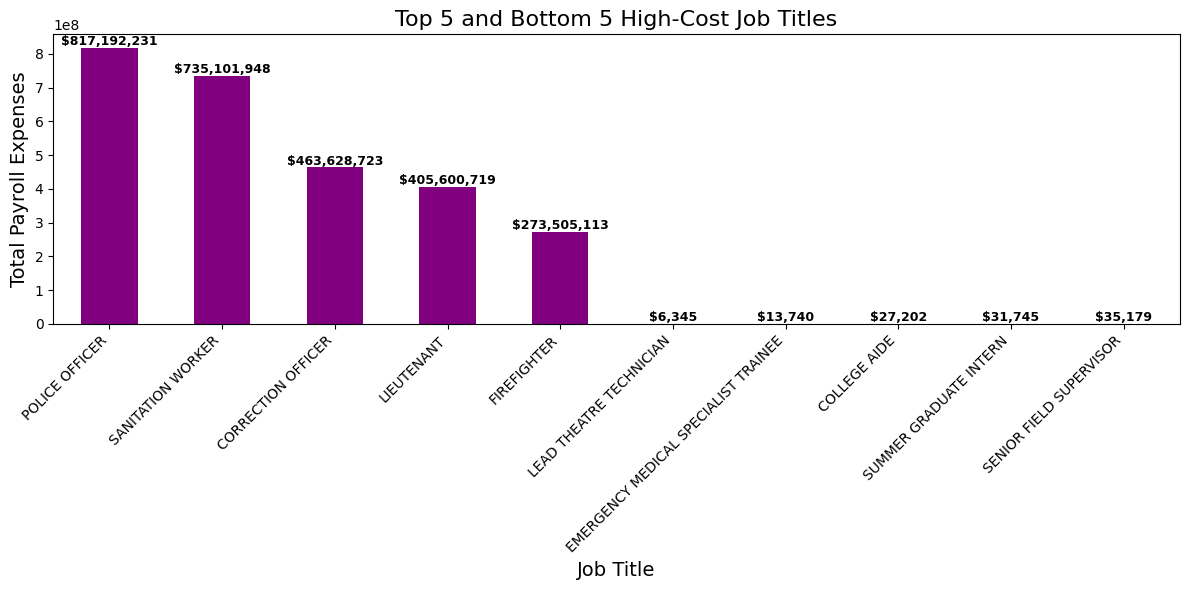

In [441]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify the largest 5 and smallest 5 high-cost job titles
largest_5 = df.groupby('Title Description')['Total Payroll'].sum().nlargest(5)
smallest_5 = df.groupby('Title Description')['Total Payroll'].sum().nsmallest(5)

# Combine the largest and smallest into a single DataFrame
combined_titles = pd.concat([largest_5, smallest_5])

# Visualize combined data
plt.figure(figsize=(12, 6))
ax = combined_titles.plot(kind='bar', color=['purple' if x in largest_5.index else 'orange' for x in combined_titles.index])
plt.title('Top 5 and Bottom 5 High-Cost Job Titles', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Total Payroll Expenses', fontsize=14)

# Set x-axis tick positions and labels explicitly
plt.xticks(range(len(combined_titles)), combined_titles.index, rotation=45, ha='right')

# Add total counts on top of each bar
for i, v in enumerate(combined_titles):
    ax.text(i, v + 0.01 * max(combined_titles), f'${int(v):,}', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [442]:
pip install squarify

**Payroll expenses by leave Status**

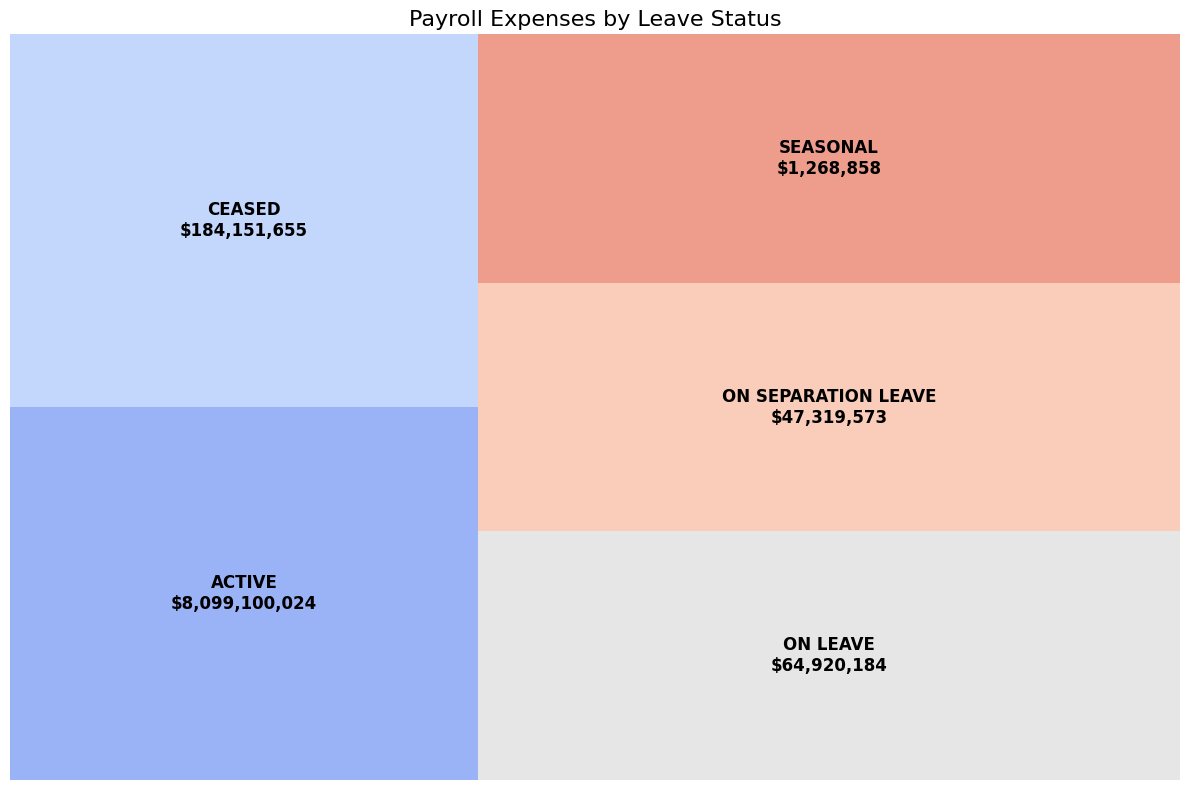

In [443]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Workforce Planning Insights
# Analyze leave patterns and their impact on payroll
leave_payroll = df.groupby('Leave Status as of June 30')['Total Payroll'].sum().reset_index()
leave_payroll = leave_payroll.rename(columns={'Leave Status as of June 30': 'Leave Status', 'Total Payroll': 'Total Payroll Expenses'})

# Create labels for the treemap (Leave Status + Total Payroll Expenses)
labels = [f"{row['Leave Status']}\n${row['Total Payroll Expenses']:,.0f}" for _, row in leave_payroll.iterrows()]

# Use equal sizes for all boxes
equal_sizes = [1] * len(leave_payroll)  # Equal sizes for all rectangles

# Plot the treemap with equal-sized boxes
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=equal_sizes,  # Equal sizes for all rectangles
    label=labels,  # Labels for each rectangle
    color=sns.color_palette('coolwarm', len(leave_payroll)),  # Color palette
    alpha=0.7,  # Transparency of the rectangles
    text_kwargs={'fontsize': 12, 'fontweight': 'bold'}  # Text properties
)

# Formatting
plt.title('Payroll Expenses by Leave Status', fontsize=16)
plt.axis('off')  # Remove axes
plt.tight_layout()
plt.show()

**Payroll Expenses Based on pay Basis**

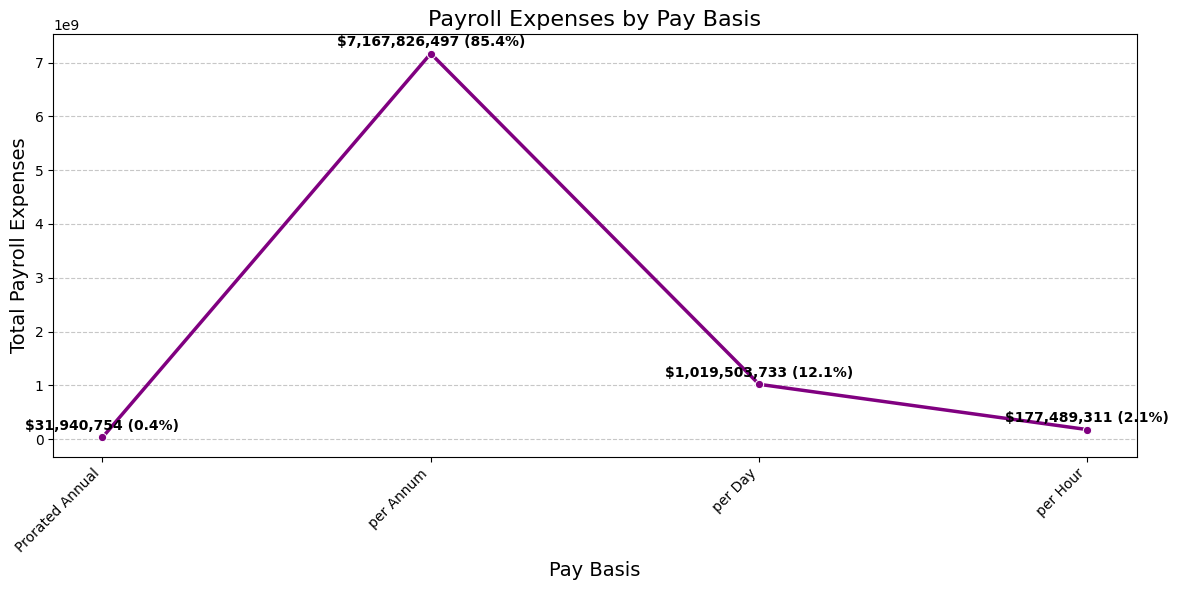

In [444]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Pay Basis Analysis
# Analyze payroll expenses by pay basis
pay_basis_payroll = df.groupby('Pay Basis')['Total Payroll'].sum().reset_index()

# Calculate percentages
total_payroll = pay_basis_payroll['Total Payroll'].sum()
pay_basis_payroll['Percentage'] = (pay_basis_payroll['Total Payroll'] / total_payroll) * 100

# Visualize payroll expenses by pay basis using a line plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='Pay Basis', y='Total Payroll', data=pay_basis_payroll, marker='o', color='purple', linewidth=2.5)

# Add values and percentages on top of each data point
for i, (pay_basis, total_payroll, percentage) in enumerate(zip(pay_basis_payroll['Pay Basis'], pay_basis_payroll['Total Payroll'], pay_basis_payroll['Percentage'])):
    ax.text(
        i,
        total_payroll + 0.02 * max(pay_basis_payroll['Total Payroll']),
        f'${total_payroll:,.0f} ({percentage:.1f}%)',  # Value and percentage
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

# Formatting
plt.title('Payroll Expenses by Pay Basis', fontsize=16)
plt.xlabel('Pay Basis', fontsize=14)
plt.ylabel('Total Payroll Expenses', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [445]:
# 6. Key Recommendations
print("\nKey Recommendations for Payroll Optimization, and Workforce Planning:")
print("- **Payroll Optimization**: Reduce overtime expenses in high-spending agencies like '{}'.".format(top_agencies_ot.index[0]))
print("- **Budget Forecasting**: Plan for increasing payroll expenses, as seen in the trend over fiscal years.")
#print("- **Workforce Planning**: Focus on managing leave patterns, especially for high-cost job titles like '{}'.".format(high_cost_titles.index[0]))
print("- **Salary Range Insights**: Allocate resources efficiently by understanding payroll distribution across salary ranges.")
print("- **Pay Basis Insights**: Optimize payroll costs by analyzing expenses by pay type (e.g., per annum, per day).")



Key Recommendations for Payroll Optimization, and Workforce Planning:
- **Payroll Optimization**: Reduce overtime expenses in high-spending agencies like 'DEPARTMENT OF SANITATION'.
- **Budget Forecasting**: Plan for increasing payroll expenses, as seen in the trend over fiscal years.
- **Salary Range Insights**: Allocate resources efficiently by understanding payroll distribution across salary ranges.
- **Pay Basis Insights**: Optimize payroll costs by analyzing expenses by pay type (e.g., per annum, per day).
